# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [21]:
iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [17]:
# если работаете в интерактивной оболочке IPython
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


**Пример** построения трехмерного графика

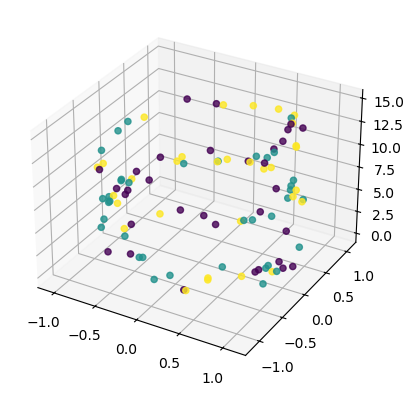

In [18]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

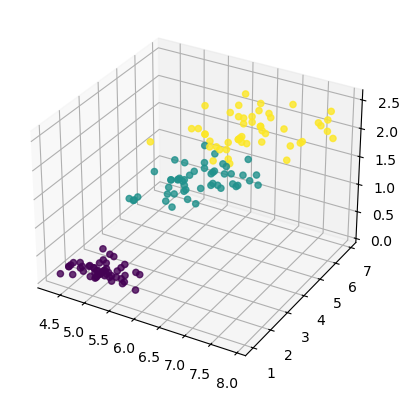

In [24]:
ax = plt.axes(projection='3d')

ax.scatter3D(iris_dataset_1[:,0], iris_dataset_1[:,1],iris_dataset_1[:,2], alpha=.8, c=iris_dataset.target)

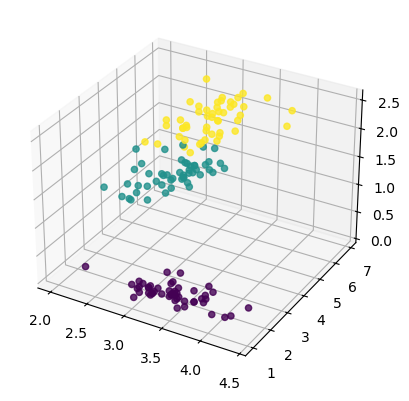

In [25]:
ax = plt.axes(projection='3d')

ax.scatter3D(iris_dataset_2[:,0], iris_dataset_2[:,1],iris_dataset_2[:,2], alpha=.8, c=iris_dataset.target)

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [53]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    iris_dataset_1, iris_dataset.target, test_size=0.2, random_state=17
)

iris_knn_1 = KNeighborsClassifier(n_neighbors=5).fit(x_train_1, y_train_1)
knn_predict_1 = iris_knn_1.predict(x_test_1)


x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    iris_dataset_2, iris_dataset.target, test_size=0.2, random_state=17
)
iris_knn_2 = KNeighborsClassifier(n_neighbors=5).fit(x_train_2, y_train_2)
knn_predict_2 = iris_knn_2.predict(x_test_2)

print(knn_predict_1,'\n', knn_predict_2)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1] 
 [0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]


### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [28]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_1 = accuracy_score(y_test_1,knn_predict_1)
accuracy_2 = accuracy_score(y_test_2,knn_predict_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9333333333333333


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [54]:
scores = {}
best_score = 0
n_neighbor = 0
for n in range(1,21):
    iris_knn_1 = KNeighborsClassifier(n_neighbors=n).fit(x_train_1, y_train_1)
    knn_predict_1 = iris_knn_1.predict(x_test_1)
    accuracy_1 = accuracy_score(y_test_1,knn_predict_1)
    scores[n] = accuracy_1
    
for num, val in scores.items():
    if val > best_score:
        best_score = val
        n_neighbor = num
    
print(f'best n_neighbors {n_neighbor} best score {best_score}')

best n_neighbors 1 best score 0.9666666666666667
